## **Necessary Imports**

In [ ]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_theme(style='whitegrid')

## **Mounting Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Initializing data folder**

In [ ]:
%cd /content/drive/MyDrive/Customer_Purchase_Behavior_Prediction/data/

/content/drive/MyDrive/Customer_Purchase_Behavior_Prediction/data


## **Reading csv file**

In [ ]:
df = pd.read_csv("preprocessed_dataset.csv")

In [ ]:
df.head()

,CustomerID,Revenue_given,Frequency,Recency,United Kingdom or Not
0,12346,0.00,2,326,1
1,12347,4310.00,182,40,0
2,12348,1797.24,31,76,0
3,12349,1757.55,73,19,0
4,12350,334.40,17,311,0


In [ ]:
encoded = [1 if df.iloc[i]["United Kingdom or Not"] else 0 for i in range(len(df))]
df["United Kingdom or Not"] = encoded

## **Viewing dataframe**

In [ ]:
df.head()

,CustomerID,Revenue_given,Frequency,Recency,United Kingdom or Not
0,12346,0.00,2,326,1
1,12347,4310.00,182,40,0
2,12348,1797.24,31,76,0
3,12349,1757.55,73,19,0
4,12350,334.40,17,311,0


## **Customers from different countries**

{1: 3950, 0: 430}


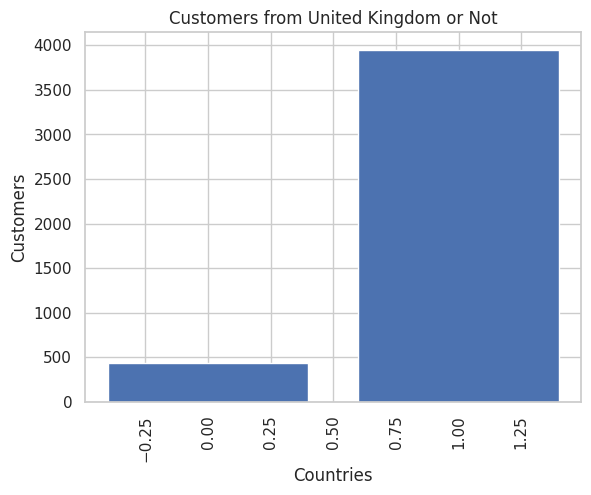

In [ ]:
customer_countries = df['United Kingdom or Not'].value_counts().to_dict()
print(customer_countries)
x = customer_countries.keys()
y = customer_countries.values()
plt.bar(x, y)
plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.ylabel('Customers')
plt.title('Customers from United Kingdom or Not')
plt.show()

## **Customer features visualization**

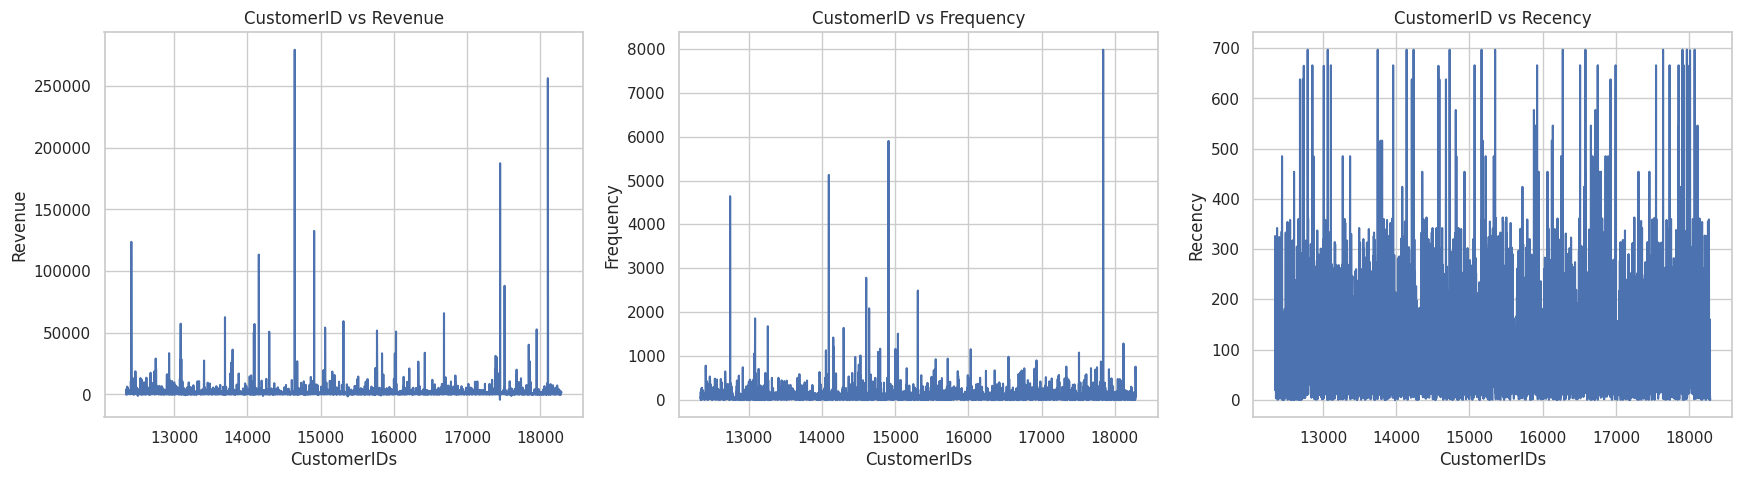

In [ ]:
plt.figure(figsize=(21,5))

plt.subplot(1,3,1)
plt.plot("CustomerID", "Revenue_given", data=df)
plt.xlabel("CustomerIDs")
plt.ylabel("Revenue")
plt.title("CustomerID vs Revenue")

plt.subplot(1,3,2)
plt.plot("CustomerID", "Frequency", data=df)
plt.xlabel("CustomerIDs")
plt.ylabel("Frequency")
plt.title("CustomerID vs Frequency")

plt.subplot(1,3,3)
plt.plot("CustomerID", "Recency", data=df)
plt.xlabel("CustomerIDs")
plt.ylabel("Recency")
plt.title("CustomerID vs Recency")

plt.show()

## **Viewing mean, standard deviation and other values for numeric columns**

In [ ]:
df.drop(['CustomerID', 'United Kingdom or Not'], axis=1).describe()

,Revenue_given,Frequency,Recency
count,4380.000000,4380.000000,4380.000000
mean,1900.415017,93.094749,100.877397
std,8212.268604,232.281775,113.867476
min,-4287.630000,1.000000,0.000000
25%,294.247500,17.000000,20.000000
50%,649.955000,42.000000,57.000000
75%,1618.455000,102.000000,152.000000
max,279489.020000,7983.000000,697.000000


## **If any kind of relationship exists between data**

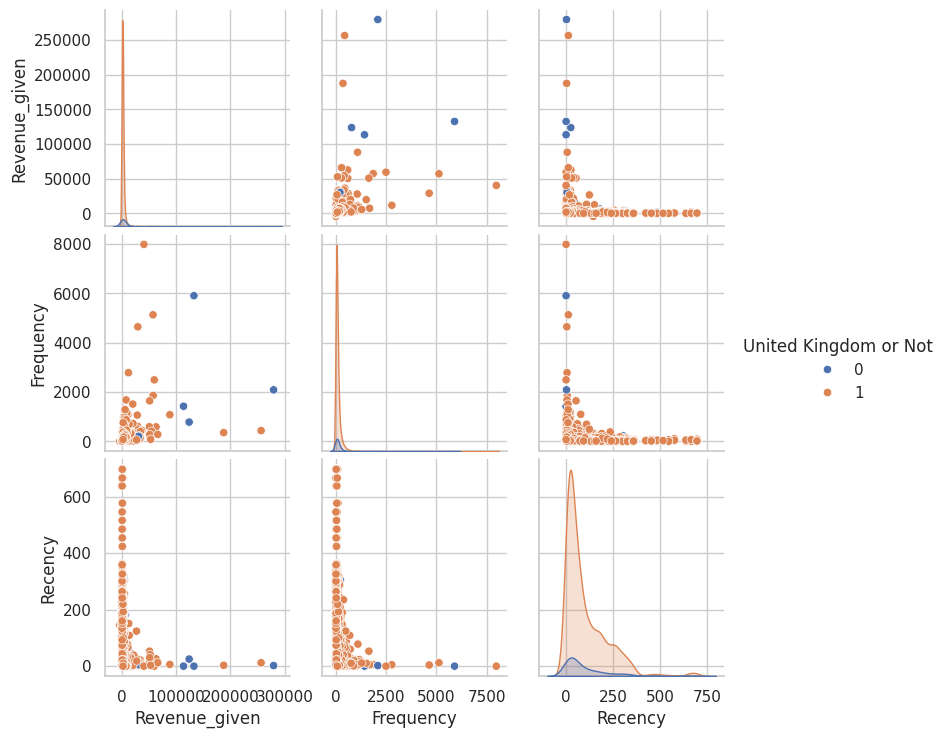

In [ ]:
sns.pairplot(df, vars=["Revenue_given", "Frequency", "Recency"], hue="United Kingdom or Not")
plt.show()

### **We can't see any kind of noticable relationships in between the data. So, we have to extract features using extraction techniques.**

## **Let's see if outliers exists in the numeric columns**

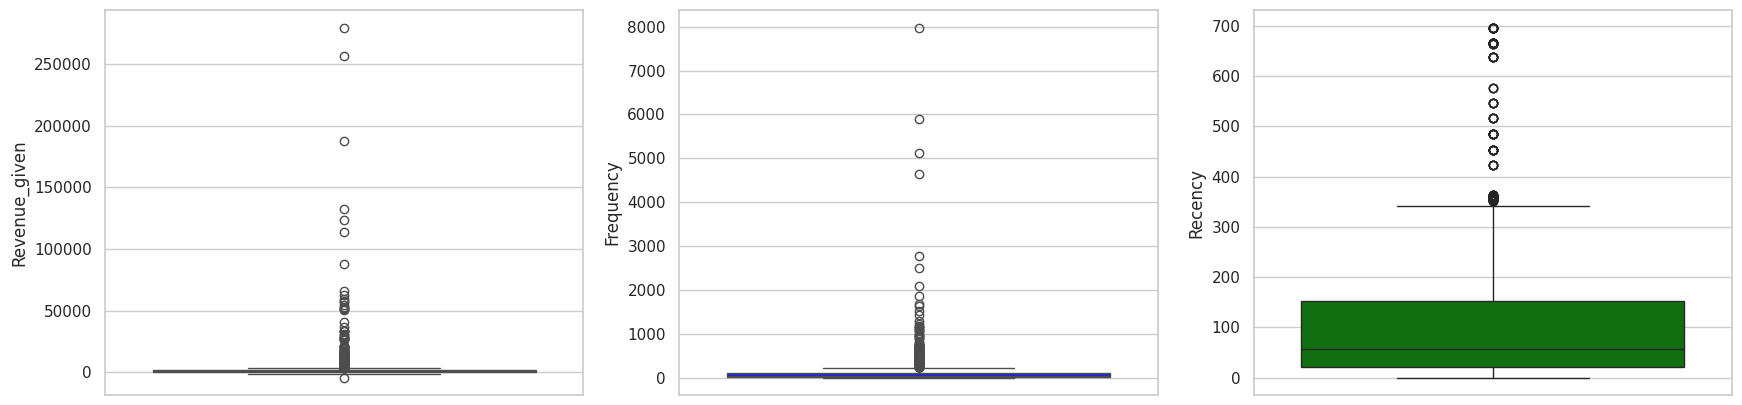

In [ ]:
plt.figure(figsize=(21,5))

plt.subplot(1,3,1)
sns.boxplot(df['Revenue_given'], color="red")

plt.subplot(1,3,2)
sns.boxplot(df['Frequency'], color="blue")

plt.subplot(1,3,3)
sns.boxplot(df['Recency'], color="green")

plt.show()

### **We can see that outliers exists in the numeric columns.**

## **Handling Outliers**

In [ ]:
def find_and_remove_outliers(df, col):
  q1, q3 = np.percentile(sorted(df[col].to_list()), [25,75])
  iqr = q3-q1
  lower_fence = q1-1.5*iqr
  upper_fence = q3+1.5*iqr
  df = df[(df[col] >= lower_fence) & (df[col] <= upper_fence)]
  return df

In [ ]:
df = find_and_remove_outliers(df, "Revenue_given")
df = find_and_remove_outliers(df, "Frequency")
df = find_and_remove_outliers(df, "Recency")
df.shape

(3622, 5)

In [ ]:
x = df.drop(["CustomerID"], axis=1)
x = x.sample(frac=1, random_state = 42).reset_index(drop=True)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test = train_test_split(x, train_size = 0.8, stratify=df["United Kingdom or Not"])
x_train.shape, x_test.shape

((2897, 4), (725, 4))

In [ ]:
# from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
train_features = x_train
test_features = x_test

In [ ]:
 from sklearn.decomposition import PCA
 pca = PCA(n_components=2)
 train_features = pca.fit_transform(x_train)
 test_features = pca.fit_transform(x_test)

In [ ]:
# from sklearn.manifold import TSNE
# tsne = TSNE(n_components=4, learning_rate='auto',init='random', perplexity=3)
# train_features = tsne.fit_transform(x_train)
# test_features = tsne.fit_transform(x_test)

ValueError: 'n_components' should be inferior to 4 for the barnes_hut algorithm as it relies on quad-tree or oct-tree.

In [ ]:
x1 = [train_features[i][0] for i in range(len(train_features))]
x2 = [train_features[i][1] for i in range(len(train_features))]

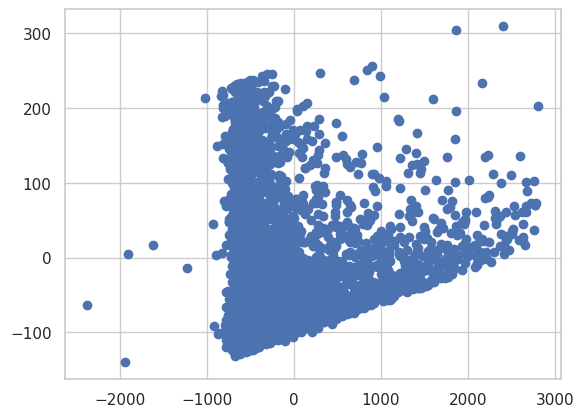

In [ ]:
plt.scatter(x1, x2)
plt.show()

In [ ]:
import random

class KMeans:
  def __init__(self):
    self.centroid_1 = []
    self.centroid_2 = []

  def fit(self, data):
     # seed setting
    random.seed(42)

    # Choosing centroids
    c1_index, c2_index = random.randint(0, len(data)), random.randint(0, len(data))
    self.centroid_1, self.centroid_2 = data[c1_index], data[c2_index]

    print(self.centroid_1)
    print(self.centroid_2)

    temp = np.empty(shape=(len(data)))

    print(temp)

  def EuclideanDistance(self, elements, centroid):
    dis = 0
    for i in range(len(elements)):
      dis += (elements[i] - centroid[i])**2
    return pow(dis, 0.5)

In [ ]:
np.empty(10)

array([0.001 , 0.002 , 0.0025, 0.005 , 0.01  , 0.02  , 0.025 , 0.05  ,
       0.1   , 0.2   ])

In [ ]:
np.mean(train_features)

5.148675564057999e-14

In [ ]:
train_features

array([[ 27.46028515, -35.61625138],
       [482.49603697, -52.98788586],
       [ 72.49705659,  31.64914257],
       ...,
       [ 89.84377423, 134.61589008],
       [810.84899629, -67.49770038],
       [632.15901921, -71.19852037]])

In [147]:
class KMeans:
  def __init__(self):
    self.centroids = np.empty(1)

  def fit(self, data, clusters, epochs = 1, random_seed = 42):
    np.random.seed(random_seed)
    N = len(data)
    centroids = data[np.random.choice(N, clusters, replace=False), :]

    labels = np.empty(N)
    old_labels = np.empty(N)

    while True:
      distances = np.linalg.norm(data[:, None, :] - centroids, axis=2)
      labels = np.argmin(distances, axis=1)
      for j in range(clusters):
            centroids[j] = np.mean(data[labels == j], axis=0)

      if np.all(labels == old_labels):
            break

      old_labels = labels
    self.centroids = centroids
    return labels

  def predict(self, data):
      distances = np.linalg.norm(data[:, None, :] - self.centroids, axis=2)
      labels = np.argmin(distances, axis=1)
      return labels


In [148]:
kmeans = KMeans()
kmeans.fit(data = train_features, clusters=2)
labels = kmeans.predict(test_features)

In [149]:
silhouette_score(test_features, labels)

0.6790852360414027

In [199]:
class KMedoids:
  def __init__(self, data, clusters):
    self.medoids = np.empty(1)
    self.data = data
    self.N = len(data)
    self.clusters = clusters

  def fit(self, random_seed = 42):
    np.random.seed(random_seed)
    data = self.data
    N = self.N
    clusters = self.clusters
    medoids_idx = np.random.choice(N, clusters, replace=False)
    medoids = data[medoids_idx].copy()
    distances = np.zeros((N, clusters))

    for i in range(clusters):
        distances[:, i] = np.sum(np.abs(data - medoids[i]), axis=1)

    labels = np.argmin(distances, axis=1)
    old_labels = np.empty(N)
    all_idxs = np.arange(N)

    while True:
      best_swap = (-1, -1, 0)
      best_distances = np.zeros(N)
      for i in range(clusters):
          non_medoids_idx = all_idxs[np.logical_not(np.isin(all_idxs, medoids_idx))]
          for j in non_medoids_idx:
              new_medoid = data[j]
              new_distances = np.sum(np.abs(data - new_medoid), axis=1)
              cost_change = np.sum(new_distances[labels == i]) - np.sum(
                  distances[labels == i, i]
              )
              if cost_change < best_swap[2]:
                  best_swap = (i, j, cost_change)
                  best_distances = new_distances

      if best_swap == (-1, -1, 0):
            break
      i, j, _ = best_swap
      distances[:, i] = best_distances
      medoids[i] = data[j]

      labels = np.argmin(distances, axis=1)

      old_labels = labels
    self.medoids = medoids
    return labels

  def predict(self, data):
      distances = np.zeros((len(data), self.clusters))
      print(f"Kmedoid: {len(distances)}")
      for i in range(self.clusters):
        distances[:, i] = np.sum(np.abs(data - self.medoids[i]), axis=1)
      labels = np.argmin(distances, axis=1)
      return labels


In [172]:
kmedoids = KMedoids(data = train_features, clusters = 2)
kmedoids.fit()

array([0, 1, 0, ..., 0, 1, 1])

In [173]:
kmedoids.predict(test_features)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,

In [202]:
class EnsembleClustering:
  def __init__(self, data, clusters):
    self.data = data
    self.clusters = clusters
    self.kmeans = None
    self.kmedoids = None

  def fit(self):
    kmeans = KMeans()
    kmeans_labels = kmeans.fit(self.data, self.clusters)
    self.kmeans = kmeans

    kmedoids = KMedoids(data = self.data, clusters = self.clusters)
    kmedoids_labels = kmedoids.fit()
    self.kmedoids = kmedoids

    labels = self.maximumVoting(kmeans_labels, kmedoids_labels)
    return labels

  def maximumVoting(self, labels1, labels2):
    labels = np.zeros(len(labels1), dtype=int)
    for i in range(len(labels1)):
      voting = np.zeros(self.clusters, dtype=int)
      voting[labels1[i]] += 1
      voting[labels1[i]] += 1
      labels[i] = voting.argmax()
    return labels

  def predict(self, data):
    print(len(data))
    kmeans_labels = self.kmeans.predict(data)
    kmedoids_labels = self.kmedoids.predict(data)
    # print(len(kmeans_labels))
    # print(len(kmedoids_labels))
    labels = self.maximumVoting(kmeans_labels, kmedoids_labels)
    print(len(labels))
    return labels

In [203]:
e_cluster = EnsembleClustering(data = train_features, clusters = 2)
e_cluster.fit()

array([0, 1, 0, ..., 0, 1, 1])

In [ ]:
labels = e_cluster.predict(test_features)

In [ ]:
len(labels)

In [182]:
from sklearn.metrics import silhouette_score

In [204]:
score = silhouette_score(test_features, e_cluster.predict(test_features))

725
Kmedoid: 725
725


In [205]:
score

0.6790852360414027

In [181]:
labels = e_cluster.predict(test_features)

In [178]:
np.unique(labels)

array([0, 1])

In [ ]:
kmedoids.predict(test_features)

ValueError: could not broadcast input array from shape (725,) into shape (2897,)

In [ ]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,

In [ ]:
kmeans.fit(data = train_features, clusters=2)

array([0, 1, 0, ..., 0, 1, 1])

In [ ]:
kmeans.centroids

array([[-3.23502660e+02, -1.11465548e+00],
       [ 1.19790514e+03,  4.12748238e+00]])

In [ ]:
def fit(data, clusters, epochs = 1, random_seed = 42):
    np.random.seed(random_seed)
    N = len(data)
    centroids = data[np.random.choice(N, clusters, replace=False), :]

    labels = np.empty(N)
    old_labels = np.empty(N)

    # while True:
    for i in range(epochs):
      distances = np.linalg.norm(data[:, None, :] - centroids, axis=2)
      labels = np.argmin(distances, axis=1)

      for j in range(clusters):
            centroids[j] = np.mean(data[labels == j], axis=0)

      if i > 0 and np.all(labels == old_labels):
            break

      old_labels = labels
      return labels


In [ ]:
len(train_features)

2897

In [ ]:
def k_medoids_clustering(
    data: np.ndarray, k: int, max_iter=100, random_seed=42
) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
    """
    k-medoid clustering with voronoi iteration
    """
    # Step 1: Initialization
    np.random.seed(random_seed)
    N = data.shape[0]
    # print(f"This is N value: {N}")
    medoids_idx = np.random.choice(N, k, replace=False)
    # print(f"medoids_idx: {medoids_idx}")
    medoids = data[medoids_idx].copy()
    # print(f"Medoids: {medoids}")
    distances = np.zeros((N, k))
    # print(f"Distances: {distances}, {len(distances)}")
    medoid_history = [medoids.copy()]
    # print(f"Medoids history: {medoid_history}")

    # print(data-medoids[0])

    for i in range(k):
        distances[:, i] = np.sum(np.abs(data - medoids[i]), axis=1)
        print(distances[:, i])

    # Assign each non-medoid data point to the closest medoid
    labels = np.argmin(distances, axis=1)
    print(labels)
    old_labels = np.empty(N)
    all_idxs = np.arange(N)

    # Step 2: Update
    for it in range(max_iter):
        best_swap = (-1, -1, 0)
        best_distances = np.zeros(N)
        for i in range(k):
            # Compute the cost of swapping medoid and non-medoid data points
            non_medoids_idx = all_idxs[np.logical_not(np.isin(all_idxs, medoids_idx))]
            for j in non_medoids_idx:
                new_medoid = data[j]
                new_distances = np.sum(np.abs(data - new_medoid), axis=1)
                cost_change = np.sum(new_distances[labels == i]) - np.sum(
                    distances[labels == i, i]
                )
                if cost_change < best_swap[2]:
                    best_swap = (i, j, cost_change)
                    best_distances = new_distances
        if best_swap == (-1, -1, 0):
            break

        i, j, _ = best_swap
        distances[:, i] = best_distances
        medoids[i] = data[j]

        labels = np.argmin(distances, axis=1)
        medoid_history.append(medoids.copy())

        old_labels = labels
    print(f"* converged after {it + 1} iterations")
    medoid_history = np.array(medoid_history)

    return labels, medoids, medoid_history

In [ ]:
k_means_clustering(data = train_features, k = 2, max_iter=2)

* converged after 2 iterations


(array([0, 1, 0, ..., 0, 1, 1]),
 array([[-3.64353200e+02,  1.51069857e-01],
        [ 1.04490077e+03, -4.33241725e-01]]),
 array([[[-6.97782514e+02, -7.47137459e+01],
         [ 9.58982568e+02, -4.95090379e+01]],
 
        [[-3.99875613e+02,  2.08150785e+00],
         [ 9.22544079e+02, -4.80220019e+00]],
 
        [[-3.64353200e+02,  1.51069857e-01],
         [ 1.04490077e+03, -4.33241725e-01]]]))

In [ ]:
len(train_features)

2897

In [ ]:
kmeans = KMeans()
kmeans.fit(train_features)

[ -73.00849869 -103.90698674]
[-390.93667974   64.21511171]
[4.86741774e-310 4.86741841e-310 4.86741774e-310 ... 6.84802807e-310
 6.84802257e-310 4.86741768e-310]


In [ ]:
kmeans.fit(train_features)

[ -73.00849869 -103.90698674]
[-390.93667974   64.21511171]


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, random_state = 42)
kmeans.fit(train_features)
# silhouette_score(test_features, kmeans.fit_predict(test_features))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [ ]:
kmeans.fit_predict(test_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,

In [ ]:
silhouette_score(test_features, kmeans.fit_predict(test_features))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.6995861288313487

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
clusters = [i for i in range(2, 21)]
scores = []

for cluster in clusters:
  kmeans = KMeans(n_clusters = cluster, random_state = 42)
  kmeans.fit(train_features)
  score = silhouette_score(test_features, kmeans.fit_predict(test_features))
  scores.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
x1 =

[0.6995861288313487, 0.5990689062109741, 0.5295126282176582, 0.5175903752599762, 0.5101453104475248, 0.41974845500056324, 0.40069760931370624, 0.3993148464670489, 0.41667981283059563, 0.4282220257291904, 0.43174523465156145, 0.4138169779089274, 0.4187862680773344, 0.4205090038178103, 0.402875518907399, 0.41503081146535326, 0.4173680057571154, 0.4058099296227973, 0.39563053328416103]


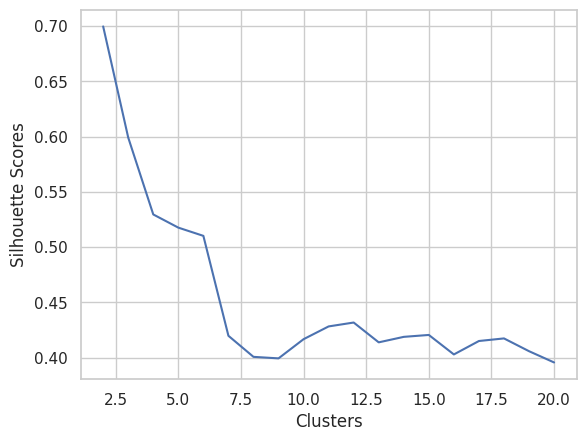

In [ ]:
print(scores)
plt.plot(clusters, scores)
plt.xlabel("Clusters")
plt.ylabel("Silhouette Scores")
plt.show()

In [ ]:
silhouette_score(x_test, kmeans.fit_predict(x_test))

from sklearn.metrics import silhouette_score

In [ ]:
scores

[0.6727357301614371,
 0.5996582698121391,
 0.5367009919111994,
 0.4894834727325023,
 0.41886566952993853,
 0.4099751137152559,
 0.4032093632294607,
 0.404690799000212,
 0.41852021780312954]

In [ ]:
silhouette_score(x_test, kmeans.fit_predict(x_test))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.5367009919111994

In [ ]:
np.unique(kmeans.labels_)

array([0, 1, 2, 3], dtype=int32)

In [ ]:
kmeans.intertia_

AttributeError: 'KMeans' object has no attribute 'intertia_'

In [ ]:
df.isna().sum()